# Weekly activity

1.  Create a **random noise color and grayscale** image. You can set a custom width and height. (Hint: use Numpy functions like `np.array`and `np.reshape`.)

In [1]:
# Set up

import sys
assert sys.version_info >= (3, 7)

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def showColorImg(window_name, img, adjust=False):
    plt.imshow(img)
    plt.title(window_name)
    plt.xticks([]), plt.yticks([])
    plt.show()

def showGrayImg(title, img):
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.xticks([]), plt.yticks([])
    plt.show()

np.random.seed(99)

if not cv.useOptimized():
    cv.setUseOptimized(True)

cv.useOptimized()

True

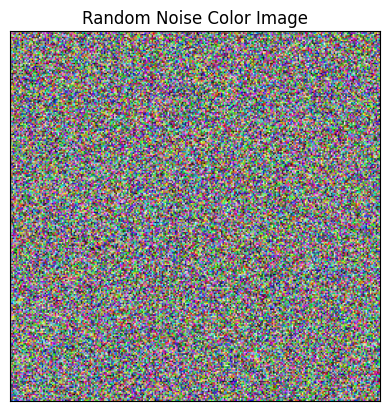

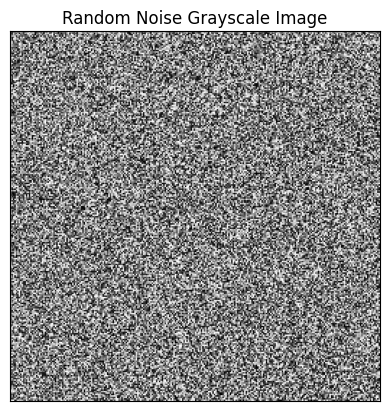

In [14]:
# The first approach
img_color = np.random.randint(0, 256, (256, 256, 3), dtype=np.uint8)
img_gray = np.random.randint(0, 256, (256, 256), dtype=np.uint8)

# Display color image|
showColorImg('Random Noise Color Image', img_color)

# Display grayscale image
showGrayImg('Random Noise Grayscale Image', img_gray)


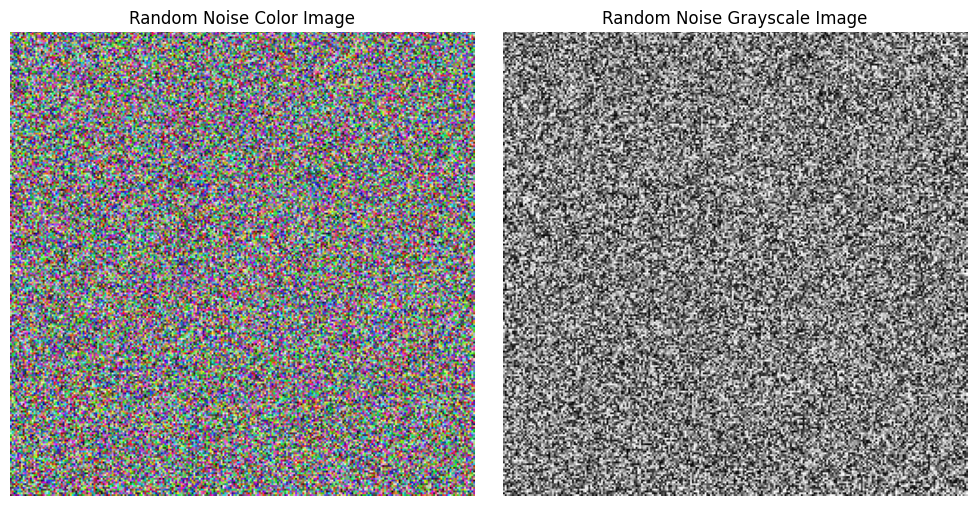

In [15]:
# The second approach
# Set the width and height to 256
width, height = 256, 256

# Generate random noise color images
noiseColorImg = np.random.randint(0, high=256, size=(height, width, 3), dtype=np.uint8)

# Generate random noise grayscale images
noiseGrayscaleImg = np.random.randint(0, high=256, size=(height, width), dtype=np.uint8)

# Create a 1x2 subplot and set the size of the plot
plt.figure(figsize=(10, 5))

# Displaying color images
plt.subplot(1, 2, 1)
plt.imshow(noiseColorImg)
plt.title("Random Noise Color Image")
plt.axis('off')

# Displays grayscale images
plt.subplot(1, 2, 2)
plt.imshow(noiseGrayscaleImg, cmap='gray')
plt.title("Random Noise Grayscale Image")
plt.axis('off')

plt.tight_layout()
plt.show()

2.  Convert the code chunk found under section [Divide an image into smaller patches using cropping](#Section1) into a function with the
    following signature:
        
        crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color)
        
        # img is the source image
        # num_horizontal_grid and num_vertical_grid are the number of patches along x and y axes.
        # line_color is the color of the grid line.
        # The output of the function should be image with grids

In [7]:
def crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color=(0, 255, 0)):
    img_copy = img.copy()

    height, width = img.shape[:2]
    M, N = int(height / num_vertical_grid), int(width / num_horizontal_grid)

    x1, y1 = 0, 0

    for y in range(0, height, M):
        for x in range(0, width, N):
            y1 = y + M
            x1 = x + N

            if x1 >= width and y1 >= height:
                x1 = width - 1
                y1 = height - 1
                cv.rectangle(img_copy, (x, y), (x1, y1), line_color, 1)

            elif y1 >= height:
                y1 = height - 1
                cv.rectangle(img_copy, (x, y), (x1, y1), line_color, 1)

            elif x1 >= width:
                x1 = width - 1
                cv.rectangle(img_copy, (x, y), (x1, y1), line_color, 1)

            else:
                cv.rectangle(img_copy, (x, y), (x1, y1), line_color, 1)

    cv.imshow('patched image', img_copy)
    cv.waitKey(0)
    cv.destroyAllWindows()

# Call function:
img = cv.imread('images/dog.jfif')
crop_grid(img, num_horizontal_grid=3, num_vertical_grid=2, line_color=(0, 255, 0))


3.  Display image sequences of smooth transition of two images with
    different values of \$\alpha\$. Refer to code in section "Image
    blending". Use *"lena.jfif"* and *"coins.jfif"* as the base images.

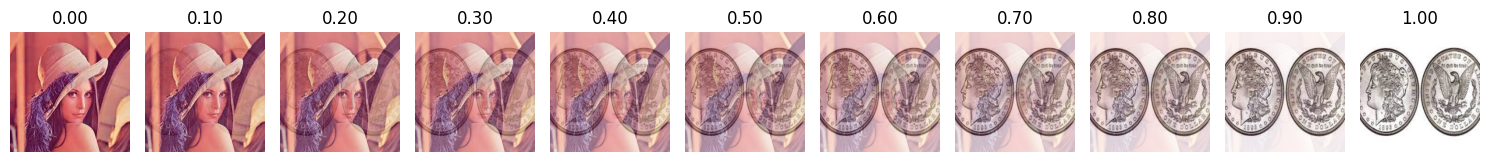

In [6]:
def blend_images(img1, img2, alpha):
    return cv2.addWeighted(img1, 1 - alpha, img2, alpha, 0)

def pltshowsub(img, col, title):
    global axes
    axes[col].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axes[col].set_title(title)
    axes[col].axis('off')

def showsubplots():
    plt.tight_layout()
    plt.show()

# Load the two base images
img1 = cv2.imread("images/lena.jfif")
img2 = cv2.imread("images/coins.jfif")

# Resize img2 to match img1's size
new_shape = img1.shape[:2]
img2 = cv2.resize(img2, new_shape[::-1])

# Create a 1x11 subplot grid and set the figure size
fig, axes = plt.subplots(1, 11, figsize=(15, 5))

# Display blended images with different alpha values
alphas = np.linspace(0, 1, 11)
for i, alpha in enumerate(alphas):
    blended = blend_images(img1, img2, alpha)
    pltshowsub(blended, i, f"{alpha:.2f}")

showsubplots()


4. Suppose you are a digital content creator and wish to share photo online. However, you wish to protect these images from being stolen or altered by others. Leverage your image processing knowledge to apply watermark on image "travel_hd.jpg". The example of resulting watermarked image are as shown in the following:




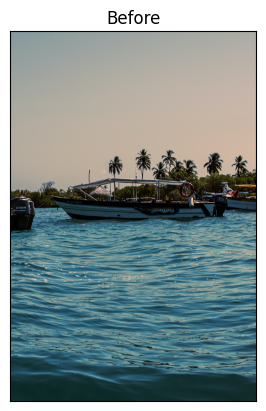

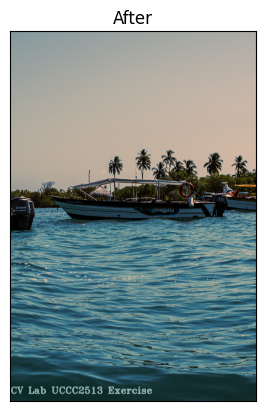

In [21]:
img = cv2.imread("images/travel_hd.jpg")
pltshowconv("Before", img)

# Define the watermark text
text = 'CV Lab UCCC2513 Exercise'
font = cv2.FONT_HERSHEY_TRIPLEX
scale = 5
thickness = 15

# Get the size of the text
text_size, _ = cv2.getTextSize(text, font, scale, thickness)

# Set the position for the watermark (bottom-left corner with an offset)
x = 10
y = img.shape[0] - text_size[1] - 10

# Create a blank watermark image with the same size as the original image
watermark = np.zeros_like(img)

# Draw the text on the watermark image
cv2.putText(watermark, text, (x, y), font, scale, (255, 255, 255), thickness)

# Blend the watermark with the original image using alpha blending
alpha = 0.5
img_watermarked = cv2.addWeighted(img, 1, watermark, alpha, 0)

# Display the watermarked image
pltshowconv('After', img_watermarked)
